In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ana_stats = pd.read_csv("ana_stats.csv")

In [4]:
ana_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           487 non-null    int64  
 1   scoped_accuracy_best_in_game         485 non-null    float64
 2   self_healing                         477 non-null    float64
 3   self_healing_most_in_game            477 non-null    float64
 4   enemies_slept                        477 non-null    float64
 5   nano_boost_assists                   449 non-null    float64
 6   unscoped_accuracy_best_in_game       487 non-null    int64  
 7   enemies_slept_most_in_game           475 non-null    float64
 8   nano_boost_assists_most_in_game      446 non-null    float64
 9   biotic_grenade_kills                 467 non-null    float64
 10  damage_amplified                     420 non-null    float64
 11  damage_amplified_most_in_game   

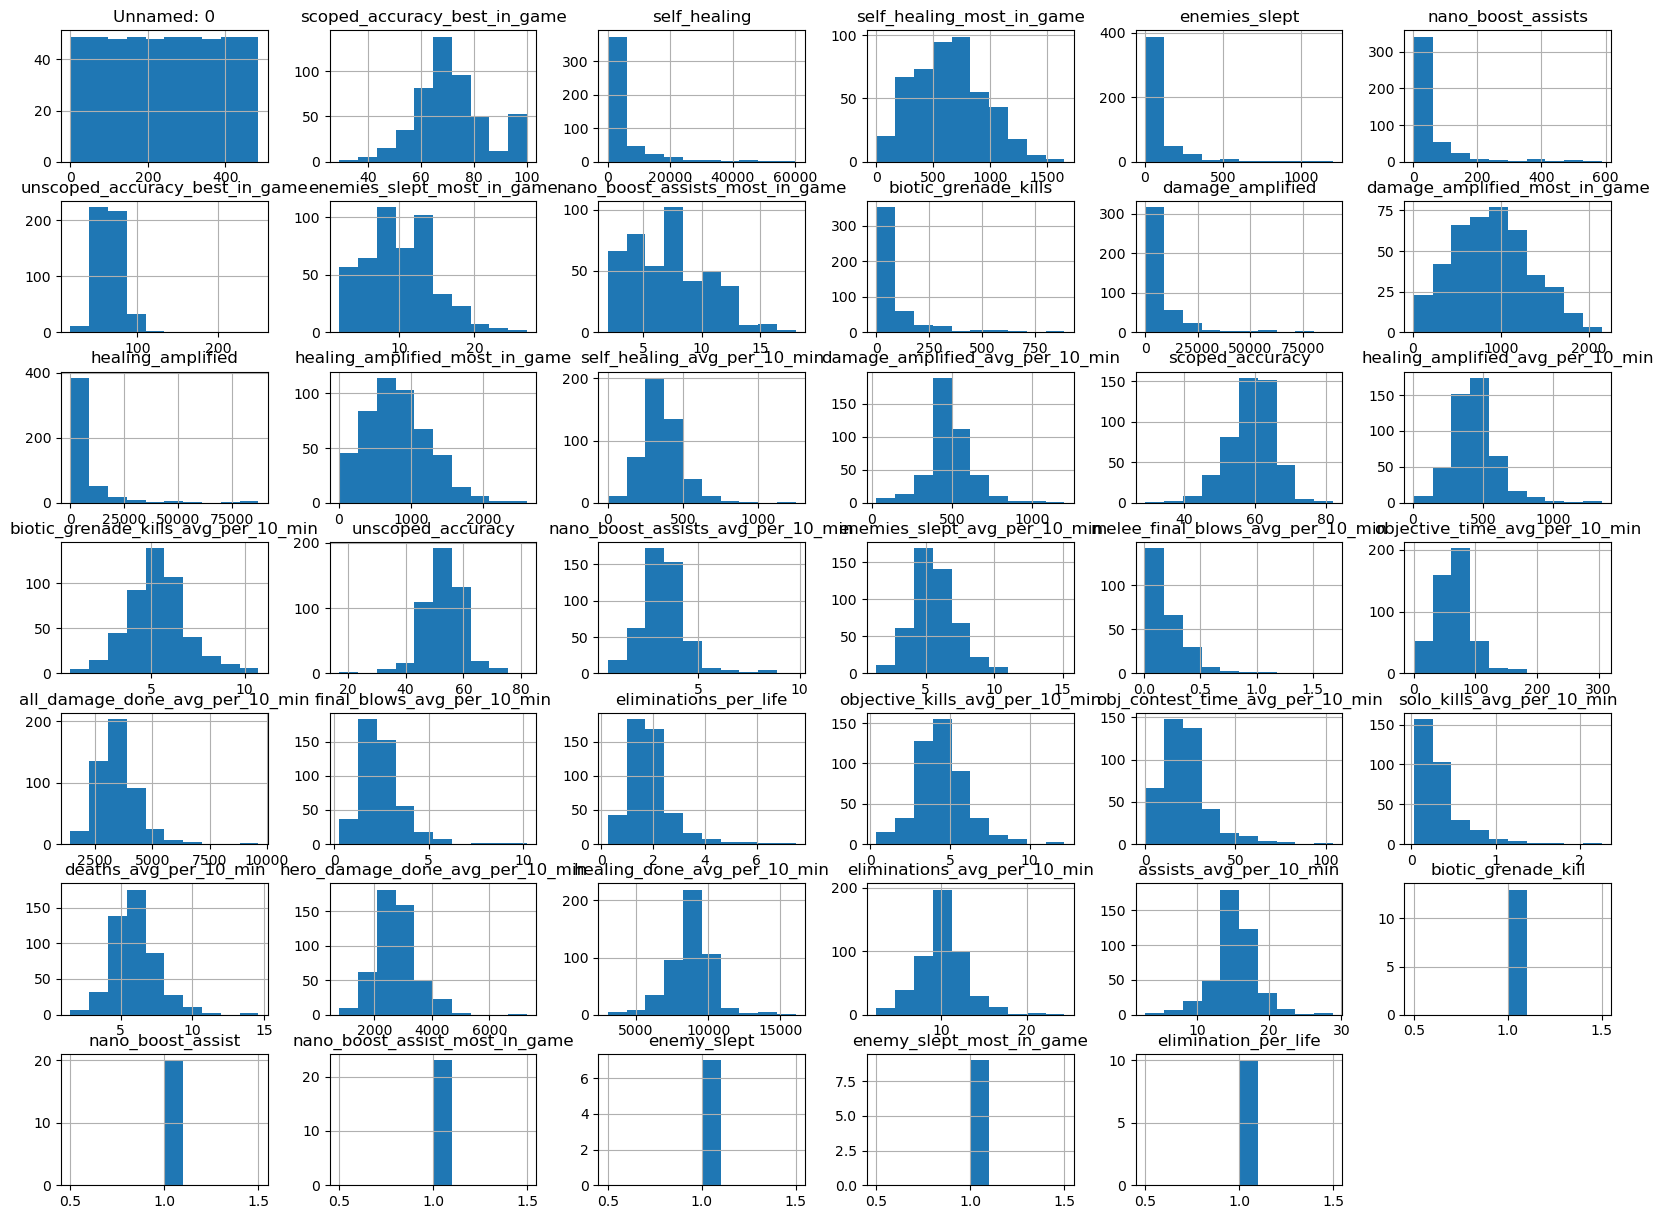

In [5]:
ana_stats.hist(bins=10,figsize=(20,15))
plt.show()

array([[<AxesSubplot:title={'center':'deaths_avg_per_10_min'}>,
        <AxesSubplot:title={'center':'assists_avg_per_10_min'}>,
        <AxesSubplot:title={'center':'eliminations_avg_per_10_min'}>],
       [<AxesSubplot:title={'center':'enemies_slept_avg_per_10_min'}>,
        <AxesSubplot:title={'center':'all_damage_done_avg_per_10_min'}>,
        <AxesSubplot:title={'center':'healing_done_avg_per_10_min'}>],
       [<AxesSubplot:title={'center':'biotic_grenade_kills_avg_per_10_min'}>,
        <AxesSubplot:title={'center':'nano_boost_assists_avg_per_10_min'}>,
        <AxesSubplot:>]], dtype=object)

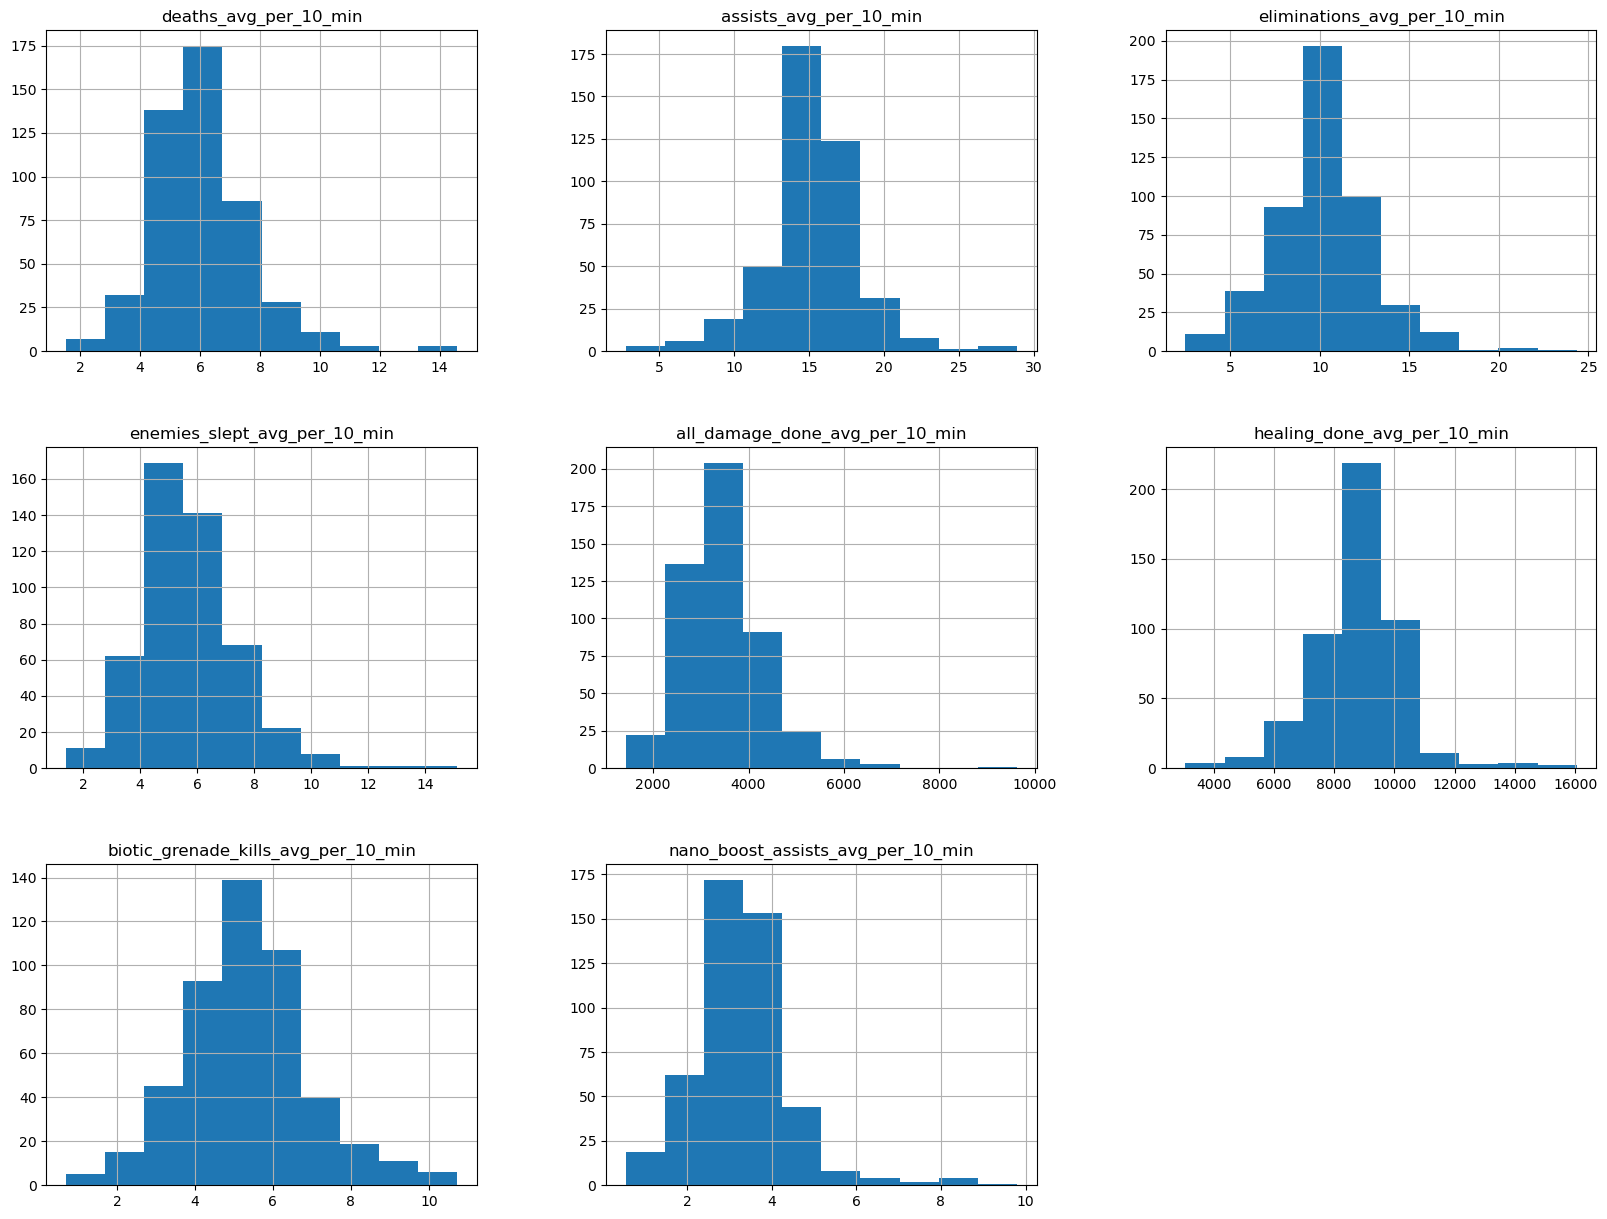

In [6]:
ana_stats.hist(column=['deaths_avg_per_10_min','assists_avg_per_10_min','eliminations_avg_per_10_min','enemies_slept_avg_per_10_min','all_damage_done_avg_per_10_min','healing_done_avg_per_10_min','biotic_grenade_kills_avg_per_10_min','nano_boost_assists_avg_per_10_min'],figsize=(20,15))

In [12]:
rank_encoder = {'bronze':0, 'silver':1,'gold':2, 'plat':3,'dia':4,'mas':5,'gm':6}
encoded_ana = ana_stats.replace({'rank':rank_encoder})
encoded_ana['rank'] = pd.to_numeric(encoded_ana['rank'])
encoded_ana['rank'].value_counts()

2    81
1    79
3    77
0    71
4    71
5    61
6    47
Name: rank, dtype: int64

In [13]:
corr_matrix = encoded_ana.corr()
corr_matrix['rank'].sort_values(ascending = False)

rank                                   1.000000
Unnamed: 0                             0.987420
scoped_accuracy                        0.351845
unscoped_accuracy                      0.299986
healing_done_avg_per_10_min            0.213548
damage_amplified_avg_per_10_min        0.169760
scoped_accuracy_best_in_game           0.156667
healing_amplified_most_in_game         0.134639
nano_boost_assists_most_in_game        0.129830
unscoped_accuracy_best_in_game         0.113426
nano_boost_assists_avg_per_10_min      0.107027
damage_amplified_most_in_game          0.105383
damage_amplified                       0.091051
healing_amplified                      0.087993
nano_boost_assists                     0.079352
self_healing                           0.065396
hero_damage_done_avg_per_10_min        0.065264
assists_avg_per_10_min                 0.064382
enemies_slept_most_in_game             0.052251
enemies_slept                          0.052118
self_healing_most_in_game              0

array([[<AxesSubplot:xlabel='rank', ylabel='rank'>,
        <AxesSubplot:xlabel='biotic_grenade_kills_avg_per_10_min', ylabel='rank'>,
        <AxesSubplot:xlabel='eliminations_avg_per_10_min', ylabel='rank'>,
        <AxesSubplot:xlabel='assists_avg_per_10_min', ylabel='rank'>,
        <AxesSubplot:xlabel='enemies_slept_avg_per_10_min', ylabel='rank'>,
        <AxesSubplot:xlabel='nano_boost_assists_avg_per_10_min', ylabel='rank'>,
        <AxesSubplot:xlabel='deaths_avg_per_10_min', ylabel='rank'>],
       [<AxesSubplot:xlabel='rank', ylabel='biotic_grenade_kills_avg_per_10_min'>,
        <AxesSubplot:xlabel='biotic_grenade_kills_avg_per_10_min', ylabel='biotic_grenade_kills_avg_per_10_min'>,
        <AxesSubplot:xlabel='eliminations_avg_per_10_min', ylabel='biotic_grenade_kills_avg_per_10_min'>,
        <AxesSubplot:xlabel='assists_avg_per_10_min', ylabel='biotic_grenade_kills_avg_per_10_min'>,
        <AxesSubplot:xlabel='enemies_slept_avg_per_10_min', ylabel='biotic_grenade_kills_

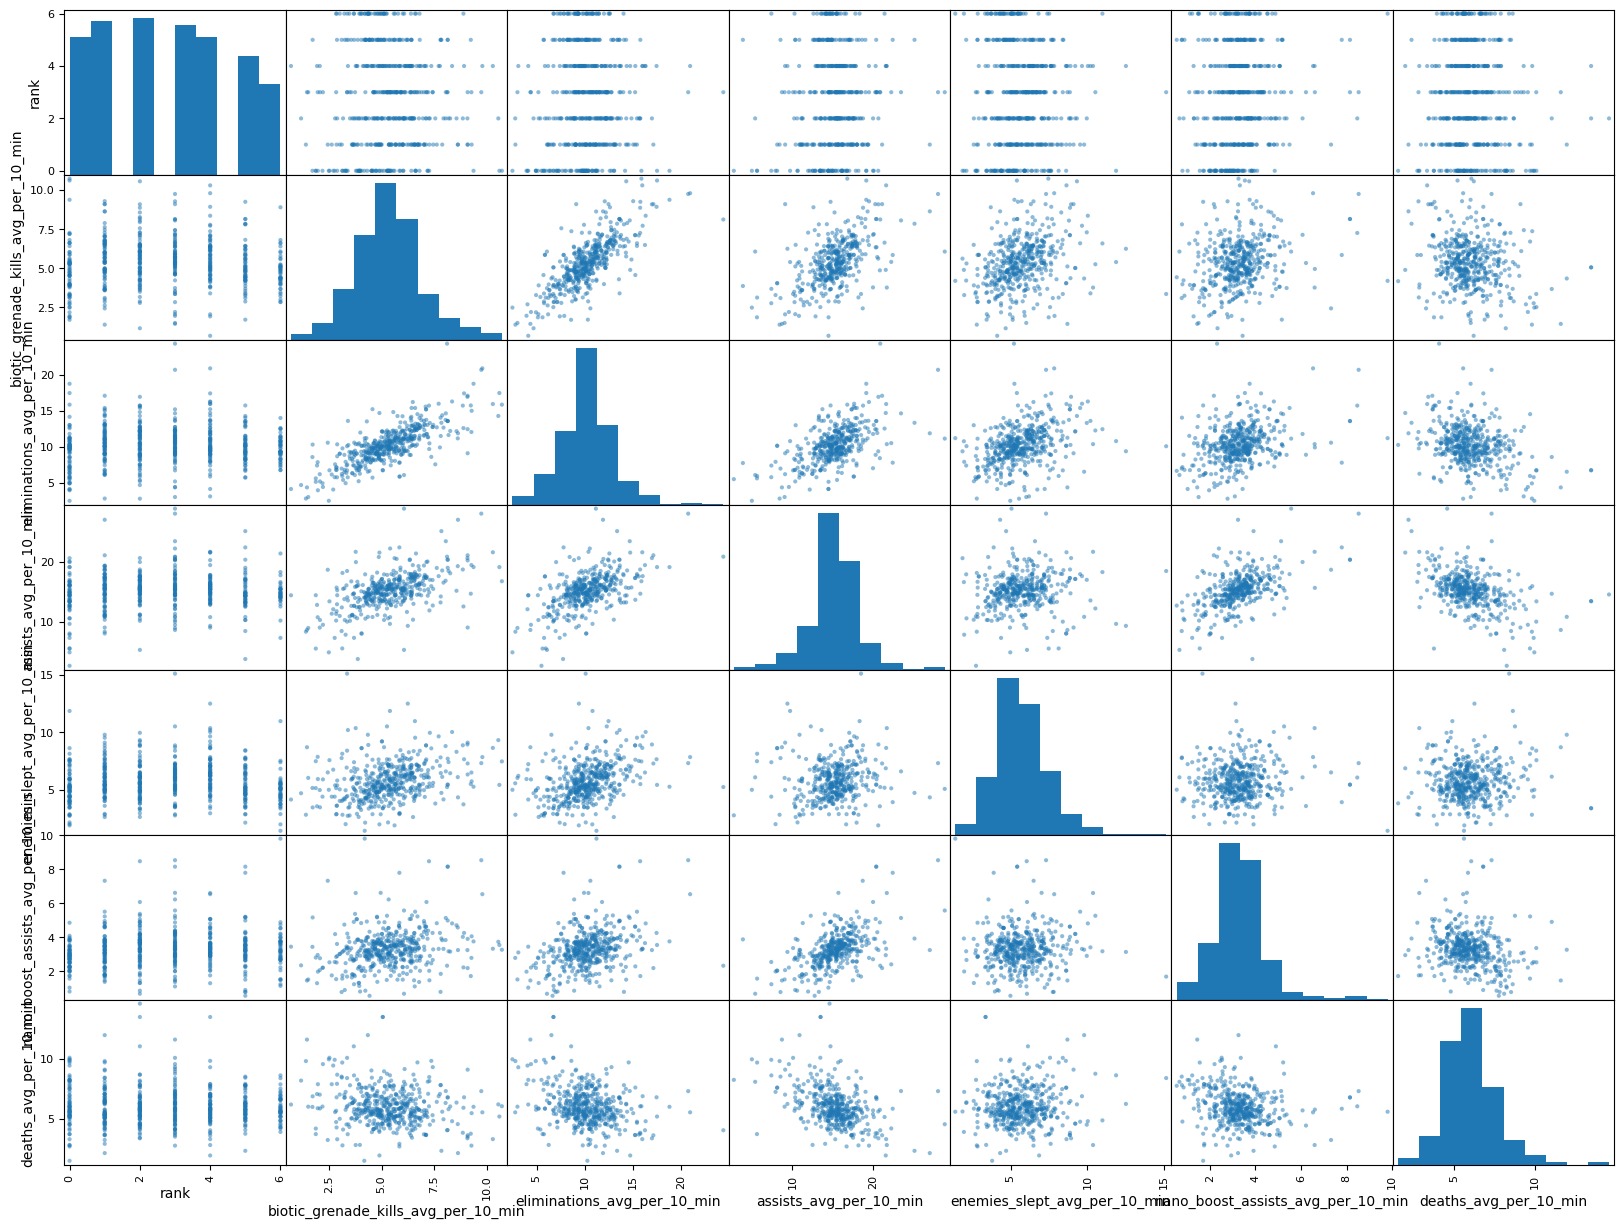

In [14]:
from pandas.plotting import scatter_matrix
attributes = ["rank","biotic_grenade_kills_avg_per_10_min", "eliminations_avg_per_10_min", "assists_avg_per_10_min",
              "enemies_slept_avg_per_10_min","nano_boost_assists_avg_per_10_min","deaths_avg_per_10_min"]
scatter_matrix(encoded_ana[attributes], figsize=(20, 15))

<AxesSubplot:xlabel='rank', ylabel='biotic_grenade_kills_avg_per_10_min'>

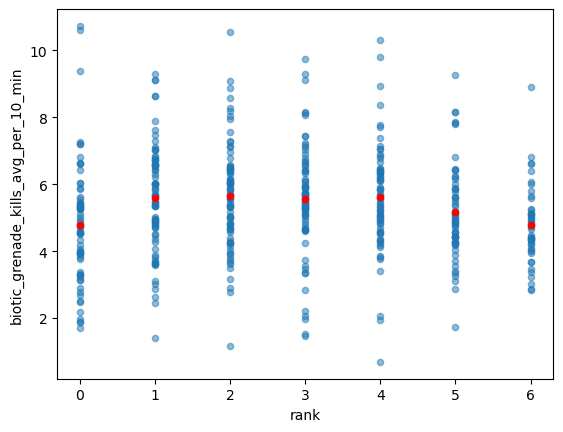

In [15]:
ax = encoded_ana.plot(kind="scatter", x="rank", y="biotic_grenade_kills_avg_per_10_min",
             alpha=0.5)
ana_means = encoded_ana.groupby("rank",as_index=False).mean()
ana_means.plot(ax= ax, kind = "scatter", x='rank', y='biotic_grenade_kills_avg_per_10_min', color = 'red' )

ML Modelling:

In [16]:
sample_incomplete_rows = encoded_ana[encoded_ana.isnull().any(axis=1)].head()
clean_ana = encoded_ana.drop(["biotic_grenade_kill","nano_boost_assist","nano_boost_assist_most_in_game","enemy_slept","enemy_slept_most_in_game", "elimination_per_life"],axis=1)  

In [17]:
clean_ana.fillna(clean_ana.mean(),inplace=True)

In [18]:

short_ana = clean_ana.drop(["scoped_accuracy_best_in_game","self_healing", 'self_healing_most_in_game', 'enemies_slept', 'nano_boost_assists',
       'unscoped_accuracy_best_in_game', 'enemies_slept_most_in_game',
       'nano_boost_assists_most_in_game', 'biotic_grenade_kills',
       'damage_amplified', 'damage_amplified_most_in_game',
       'healing_amplified', 'healing_amplified_most_in_game'],axis=1)

In [19]:
features = short_ana.columns[1:]

In [20]:
X = short_ana.drop("rank",axis=1)
y = short_ana["rank"]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X,y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy', random_state=42)
rf.fit(X_train,y_train)
train_score = rf.score(X_train,y_train)
test_score = rf.score(X_test,y_test)
print(f'training accuracy: {train_score} \n testing accuracy: {test_score}')

training accuracy: 1.0 
 testing accuracy: 0.7755102040816326


In [22]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 100, random_state=42)
ada.fit(X_train,y_train)
ada_train_score = ada.score(X_train,y_train)
ada_test_score = ada.score(X_test,y_test)
print(f'training accuracy: {ada_train_score} \n testing accuracy: {ada_test_score}')

training accuracy: 0.5735294117647058 
 testing accuracy: 0.54421768707483


In [23]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train,y_train)
svm_train_score = svm.score(X_train,y_train)
svm_test_score = svm.score(X_test,y_test)
print(f'training accuracy: {svm_train_score} \n testing accuracy: {svm_test_score}')

training accuracy: 0.8411764705882353 
 testing accuracy: 0.43537414965986393


In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=41,penalty = 'l1',C = 1, solver='saga', max_iter = 5000)
lr.fit(X_train,y_train)
lr_train_score = lr.score(X_train,y_train)
lr_test_score = lr.score(X_test,y_test)
print(f'training accuracy: {lr_train_score} \n testing accuracy: {lr_test_score}')

training accuracy: 0.9647058823529412 
 testing accuracy: 0.8367346938775511


In [25]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(random_state=41, max_iter=1000,hidden_layer_sizes = (50,20,10), alpha=5,activation='relu')
nn.fit(X_train, y_train)
nn_train_score = nn.score(X_train,y_train)
nn_test_score = nn.score(X_test,y_test)
print(f'training accuracy: {nn_train_score} \n testing accuracy: {nn_test_score}')

training accuracy: 0.9941176470588236 
 testing accuracy: 0.9251700680272109


c:\Users\randy\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


The simple neural network seems to have the best performance. We will further fine-tune our NN model.

In [32]:
parameters = {'hidden_layer_sizes':[(100,),(50,),(20,),(100,50),(50,20),(20,10),(100,50,20),(50,20,10),(100,50,20,10)],'alpha':[0.0001,0.001,0.01,0.1,1,2,5,10,100],'activation':('identity','logistic','tanh','relu'),'max_iter':[3000]}
from sklearn.model_selection import GridSearchCV
nn2 = MLPClassifier()
clf = GridSearchCV(nn2,parameters)
clf.fit(X_train,y_train)
nn2_train_score = clf.score(X_train,y_train)
nn2_test_score = clf.score(X_test,y_test)

print(f'training accuracy: {nn2_train_score} \n testing accuracy: {nn2_test_score}')

c:\Users\randy\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\randy\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\randy\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\randy\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\randy\miniconda3\lib\site-packages\sklearn\neural_netwo

training accuracy: 0.9852941176470589 
 testing accuracy: 0.9251700680272109


In [33]:
optimized_params = clf.best_params_
print(optimized_params)

{'activation': 'identity', 'alpha': 5, 'hidden_layer_sizes': (100, 50, 20, 10), 'max_iter': 3000}


Best Predictor: neural network with identity activiation and 4 layers.

In [35]:
short_ana.head()

,Unnamed: 0,self_healing_avg_per_10_min,damage_amplified_avg_per_10_min,scoped_accuracy,healing_amplified_avg_per_10_min,biotic_grenade_kills_avg_per_10_min,unscoped_accuracy,nano_boost_assists_avg_per_10_min,enemies_slept_avg_per_10_min,melee_final_blows_avg_per_10_min,...,eliminations_per_life,objective_kills_avg_per_10_min,obj_contest_time_avg_per_10_min,solo_kills_avg_per_10_min,deaths_avg_per_10_min,hero_damage_done_avg_per_10_min,healing_done_avg_per_10_min,eliminations_avg_per_10_min,assists_avg_per_10_min,rank
0,0,415.0,532.000000,58.0,558.0,3.91,53,3.15,4.10,0.190000,...,1.25,2.76,34.000000,0.100000,5.43,2343.0,9618,6.77,14.010000,0
1,1,193.0,488.875143,69.0,857.0,1.71,54,3.43,5.14,0.220512,...,1.43,0.86,22.194774,0.336075,6.00,2509.0,9641,8.57,15.194918,0
2,2,255.0,323.000000,67.0,390.0,4.60,59,2.46,5.22,0.220512,...,2.13,3.68,18.000000,0.610000,4.60,2814.0,8597,9.82,12.890000,0
3,3,198.0,317.000000,54.0,313.0,3.29,38,1.98,1.98,0.220512,...,1.09,2.64,6.000000,1.320000,7.25,2671.0,7635,7.91,7.910000,0
4,4,387.0,488.875143,60.0,947.0,5.36,49,3.97,7.15,0.220512,...,1.38,6.95,22.194774,0.200000,7.75,2800.0,8906,10.73,15.194918,0
